In [18]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import plot_model
import numpy as np
from skimage.transform import resize
import plotly.express as px
import plotly.graph_objs as go

from phdr.data.hoda_dataset_reader import read_hoda_cdb, read_hoda_dataset

In [19]:
np.random.seed(42)

In [20]:
dataset_path = "../data/raw/hoda/"

print('Reading Train 60000.cdb ...')
x_train_org, y_train_org = read_hoda_cdb(dataset_path + 'train_60k.cdb')

print('Reading Test 20000.cdb ...')
x_test_org, y_test_org = read_hoda_cdb(dataset_path + 'test_20k.cdb')

# print('Reading RemainingSamples.cdb ...')
# remaining_images, remaining_labels = read_hoda_cdb(dataset_path + 'remaining_samples.cdb')

Reading Train 60000.cdb ...
Reading Test 20000.cdb ...


In [21]:
print(len(y_train_org))
print(len(y_test_org))

60000
20000


In [22]:
data_ratio = 0.1
x_train = x_train_org[:int(len(x_train_org) * data_ratio)]
y_train = y_train_org[:int(len(y_train_org) * data_ratio)]
x_test = x_test_org[:int(len(x_test_org) * data_ratio)]
y_test = y_test_org[:int(len(y_test_org) * data_ratio)]
print(len(x_train))
print(len(x_test))

6000
2000


In [23]:
# reshape imagesto 5x5
x_train = [resize(image, (5, 5)) for image in x_train]
x_test = [resize(image, (5, 5)) for image in x_test]
x_test[-1].shape

(5, 5)

In [24]:
print(len(x_train))
print(len(x_test))

6000
2000


In [25]:
x_train = np.array(x_train).reshape(len(x_train), 25).astype('float32')
y_train = keras.utils.to_categorical(y_train, 10)
x_test = np.array(x_test).reshape(len(x_test), 25).astype('float32')
y_test = keras.utils.to_categorical(y_test, 10)
print(x_test.shape)
print(y_test.shape)

(2000, 25)
(2000, 10)


In [26]:
x_train /= 255
x_test /= 255

In [27]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=25))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                1664      
                                                                 
 dense_3 (Dense)             (None, 200)               13000     
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_4 (Dense)             (None, 10)                2010      
                                                                 
Total params: 16,674
Trainable params: 16,674
Non-trainable params: 0
_________________________________________________________________


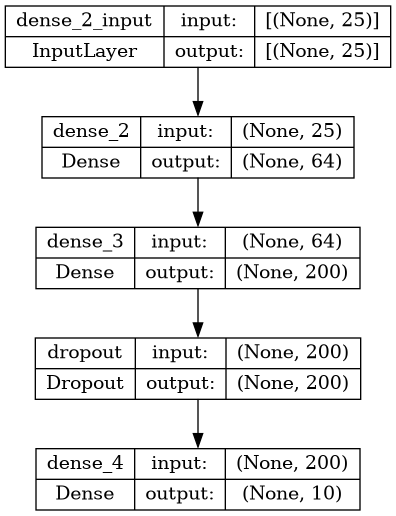

In [28]:
plot_model(model, show_shapes=True)

In [29]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)

In [30]:
history = model.fit(
    x_train,
    y_train,
    epochs=30,
    batch_size=64,
    validation_split=0.2,
    verbose=True
)

Epoch 1/30
75/75 [==============================] - 1s 3ms/step - loss: 2.3005 - accuracy: 0.1260 - val_loss: 2.2958 - val_accuracy: 0.2025
Epoch 2/30
75/75 [==============================] - 0s 1ms/step - loss: 2.2904 - accuracy: 0.1817 - val_loss: 2.2732 - val_accuracy: 0.1300
Epoch 3/30
75/75 [==============================] - 0s 1ms/step - loss: 2.2431 - accuracy: 0.2165 - val_loss: 2.1769 - val_accuracy: 0.3042
Epoch 4/30
75/75 [==============================] - 0s 1ms/step - loss: 2.0956 - accuracy: 0.2667 - val_loss: 1.9628 - val_accuracy: 0.3617
Epoch 5/30
75/75 [==============================] - 0s 1ms/step - loss: 1.8938 - accuracy: 0.2965 - val_loss: 1.7753 - val_accuracy: 0.4142
Epoch 6/30
75/75 [==============================] - 0s 1ms/step - loss: 1.7549 - accuracy: 0.3333 - val_loss: 1.6499 - val_accuracy: 0.4300
Epoch 7/30
75/75 [==============================] - 0s 1ms/step - loss: 1.6497 - accuracy: 0.3710 - val_loss: 1.5655 - val_accuracy: 0.4508
Epoch 8/30
75/75 [==

In [31]:
# Plot training & validation accuracy values
fig = go.Figure()
fig.add_trace(go.Scatter(
    y=history.history['accuracy'],
    mode='lines+markers',
    name='Train'
))
fig.add_trace(go.Scatter(
    y=history.history['val_accuracy'],
    mode='lines+markers',
    name='Validation'
))
fig.update_layout(
    title='Model accuracy',
    xaxis_title='Epoch',
    yaxis_title='Accuracy'
)
fig.show()

In [32]:
# Plot training & validation loss values
fig = go.Figure()
fig.add_trace(go.Scatter(
    y=history.history['loss'],
    mode='lines+markers',
    name='Train'
))
fig.add_trace(go.Scatter(
    y=history.history['val_loss'],
    mode='lines+markers',
    name='Validation'
))
fig.update_layout(
    title='Model loss',
    xaxis_title='Epoch',
    yaxis_title='Loss'
)
fig.show()

In [33]:
loss, accuracy = model.evaluate(x_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

63/63 [==============================] - 0s 610us/step - loss: 0.3375 - accuracy: 0.9010
Test loss: 0.3375461995601654
Test accuracy: 0.9010000228881836


In [34]:
predictions = model.predict(x_test)
print(predictions)
print(y_test)

63/63 [==============================] - 0s 490us/step
[[9.61290419e-01 6.63155271e-03 8.94526011e-07 ... 3.77259255e-07
  9.27307992e-05 1.35861399e-07]
 [9.29656267e-01 1.33752252e-03 2.48637058e-08 ... 1.10307612e-08
  1.14938644e-04 1.81705975e-08]
 [9.12498310e-02 2.70411652e-02 2.00106242e-05 ... 1.30202179e-05
  1.25466570e-01 1.38976995e-03]
 ...
 [5.93362451e-01 9.73370916e-04 4.29555271e-08 ... 2.62450683e-08
  3.02963913e-03 6.39507448e-07]
 [6.98569179e-01 1.19634364e-02 8.36891267e-09 ... 1.97446748e-09
  9.13866214e-04 2.50080006e-07]
 [5.59013151e-02 9.32777286e-01 1.70650904e-03 ... 4.64534009e-04
  9.33552292e-05 8.07474644e-05]]
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
